In [83]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [87]:
# Convert date columns to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [89]:
# Combine the datasets into a single dataframe for unified analysis
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

In [91]:
# Calculate total revenue, MoM, and YoY growth
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
merged_df['TransactionYear'] = merged_df['TransactionDate'].dt.to_period('Y')

In [93]:
# Overall sales
total_revenue = merged_df['TotalValue'].sum()
print(f"Total Sales Revenue: ${total_revenue:,.2f}")

Total Sales Revenue: $689,995.56


In [ ]:
-- Investigate the reasons for large spikes (e.g., promotions, holidays) and replicate successful campaigns.
Address steep declines by offering discounts, marketing campaigns, or time-limited promotions in months with historically low sales.

In [103]:
# MoM Growth
monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].sum()
mom_growth = monthly_sales.pct_change() * 100
print("Month-over-Month (MoM) Growth (%):")
print(mom_growth)


Month-over-Month (MoM) Growth (%):
TransactionMonth
2023-12            NaN
2024-01    1660.871145
2024-02     -22.473533
2024-03      -7.055172
2024-04      20.260479
2024-05      12.184970
2024-06     -24.418273
2024-07      46.329021
2024-08     -11.111183
2024-09      11.297885
2024-10     -33.341756
2024-11     -18.780802
2024-12      54.480505
Freq: M, Name: TotalValue, dtype: float64


In [105]:
# YoY Growth
yearly_sales = merged_df.groupby('TransactionYear')['TotalValue'].sum()
yoy_growth = yearly_sales.pct_change() * 100
print("Year-over-Year (YoY) Growth (%):")
print(yoy_growth)

Year-over-Year (YoY) Growth (%):
TransactionYear
2023             NaN
2024    18104.600055
Freq: Y-DEC, Name: TotalValue, dtype: float64


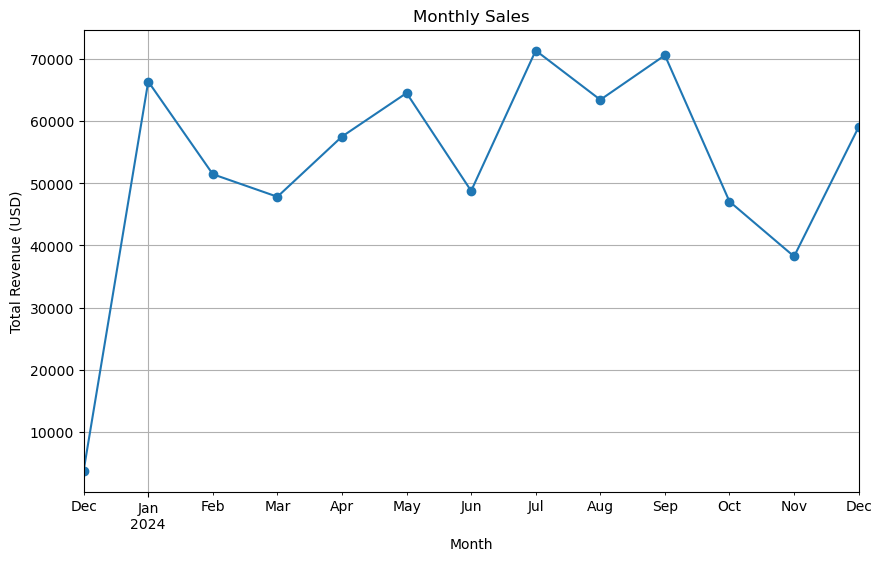

In [99]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Month')
plt.grid()
plt.show()

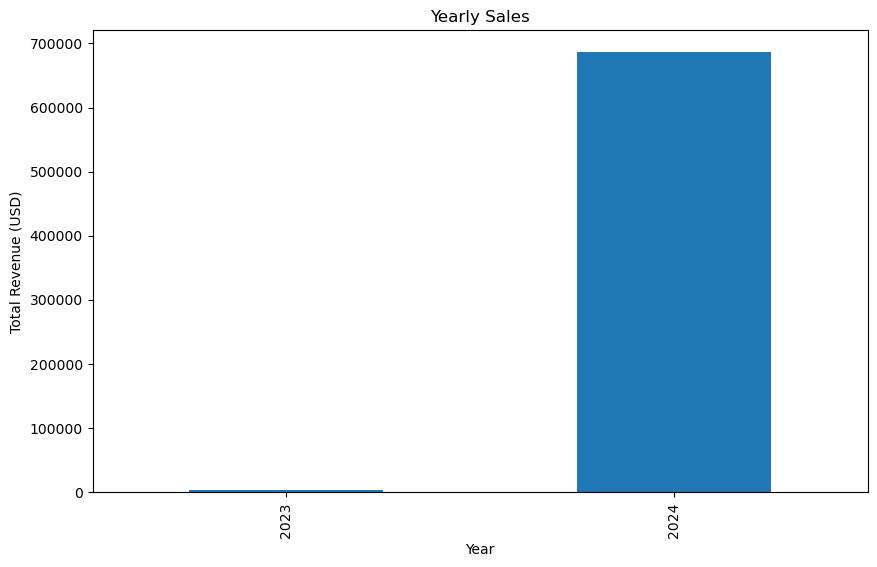

In [31]:
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', title='Yearly Sales')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Year')
plt.show()

In [107]:
# Identify the top 10 products by total revenue
revenue_per_product = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
top_10_products = revenue_per_product.head(10)
top_10_products_percentage = (top_10_products / total_revenue) * 100
print("Top 10 Products and their Revenue Contribution (%):")
print(top_10_products_percentage)

Top 10 Products and their Revenue Contribution (%):
ProductName
ActiveWear Smartwatch      5.666264
SoundWave Headphones       3.653884
SoundWave Novel            3.551892
ActiveWear Jacket          3.291697
ActiveWear Rug             3.233996
TechPro Headphones         2.828105
BookWorld Cookbook         2.785814
BookWorld Sweater          2.716509
TechPro Textbook           2.647547
ActiveWear Cookware Set    2.620847
Name: TotalValue, dtype: float64


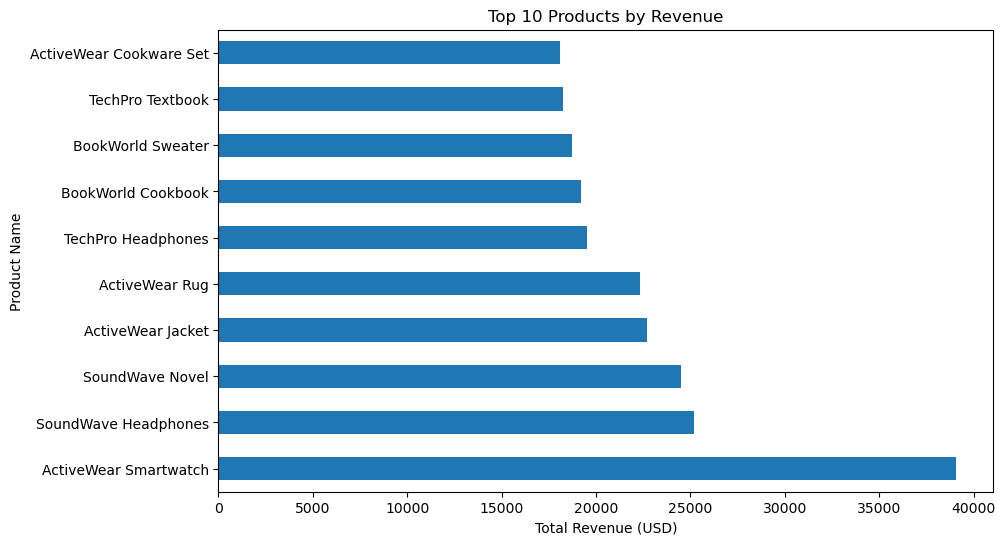

In [35]:
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', title='Top 10 Products by Revenue')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Product Name')
plt.show()

In [109]:
# Identify the best-performing categories and calculate MoM/YoY growth
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue_percentage = (category_revenue / total_revenue) * 100
print("Category Revenue Contribution (%):")
print(category_revenue_percentage)

Category Revenue Contribution (%):
Category
Books          27.847639
Electronics    26.200676
Clothing       24.082859
Home Decor     21.868826
Name: TotalValue, dtype: float64


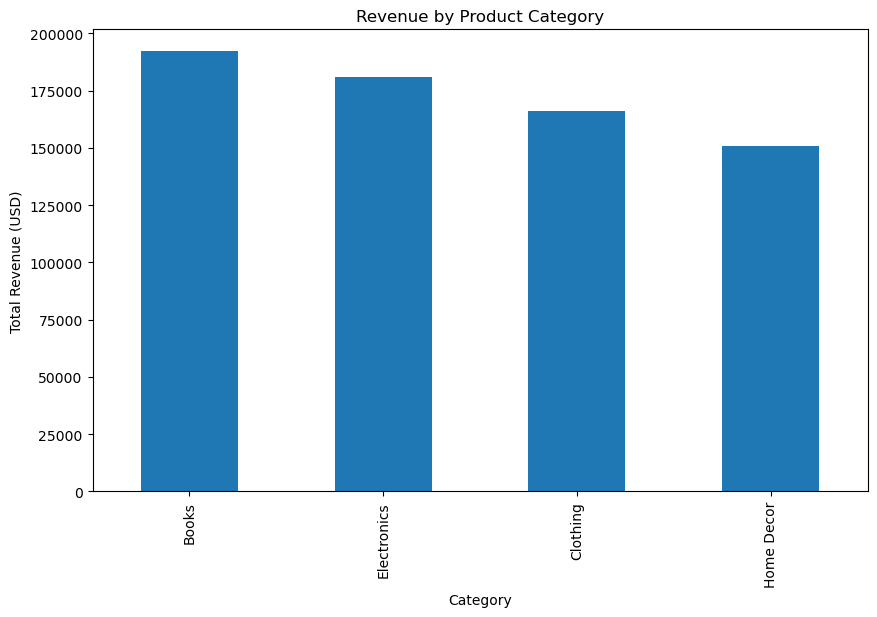

In [39]:
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', title='Revenue by Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Category')
plt.show()

In [111]:
# Analyze when customers are most active
category_mom_growth = merged_df.groupby(['Category', 'TransactionMonth'])['TotalValue'].sum().groupby(level=0).pct_change() * 100
category_yoy_growth = merged_df.groupby(['Category', 'TransactionYear'])['TotalValue'].sum().groupby(level=0).pct_change() * 100
print("Category Month-over-Month (MoM) Growth (%):")
print(category_mom_growth)
print("Category Year-over-Year (YoY) Growth (%):")
print(category_yoy_growth)

Category Month-over-Month (MoM) Growth (%):
Category     TransactionMonth
Books        2024-01                     NaN
             2024-02               20.314644
             2024-03              -56.857227
             2024-04               23.962141
             2024-05               93.373250
             2024-06              -25.343867
             2024-07               13.713971
             2024-08                1.498326
             2024-09              -17.701812
             2024-10              -13.045290
             2024-11              -21.444347
             2024-12               74.347799
Clothing     2023-12                     NaN
             2024-01             1034.408589
             2024-02              -55.006656
             2024-03               -7.065045
             2024-04               92.207571
             2024-05               19.247501
             2024-06              -23.316520
             2024-07               25.714872
             2024-08      

In [115]:
merged_df['OrderHour'] = merged_df['TransactionDate'].dt.hour
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [123]:
# Compare order activity on weekdays vs weekends
merged_df['OrderPeriod'] = merged_df['OrderHour'].apply(categorize_time)
orders_by_period = merged_df['OrderPeriod'].value_counts()
orders_by_period_percentage = (orders_by_period / orders_by_period.sum()) * 100
print("Orders by Time Period (%):")
print(orders_by_period_percentage)

Orders by Time Period (%):
OrderPeriod
Night        33.2
Morning      28.1
Afternoon    21.4
Evening      17.3
Name: count, dtype: float64


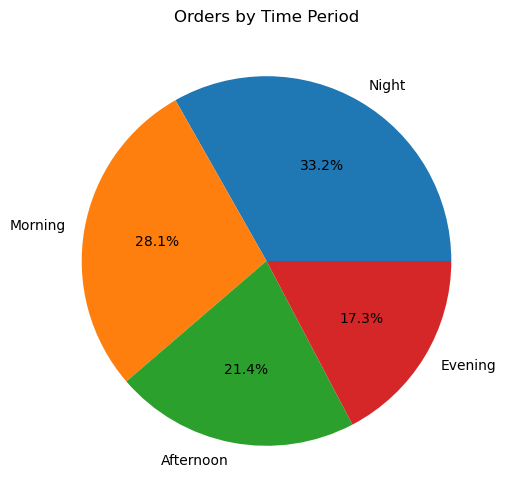

In [128]:
plt.figure(figsize=(10, 6))
orders_by_period.plot(kind='pie', autopct='%1.1f%%', title='Orders by Time Period')
plt.ylabel('')
plt.show()

In [134]:
# Compare order activity on weekdays vs weekends
merged_df['IsWeekend'] = merged_df['TransactionDate'].dt.dayofweek.isin([5, 6])
weekday_orders = merged_df[~merged_df['IsWeekend']]['TransactionID'].count()
weekend_orders = merged_df[merged_df['IsWeekend']]['TransactionID'].count()
weekday_percentage = (weekday_orders / (weekday_orders + weekend_orders)) * 100
weekend_percentage = (weekend_orders / (weekday_orders + weekend_orders)) * 100
print(f"Weekday Orders: {weekday_orders} ({weekday_percentage:.2f}%)")
print(f"Weekend Orders: {weekend_orders} ({weekend_percentage:.2f}%)")

Weekday Orders: 735 (73.50%)
Weekend Orders: 265 (26.50%)


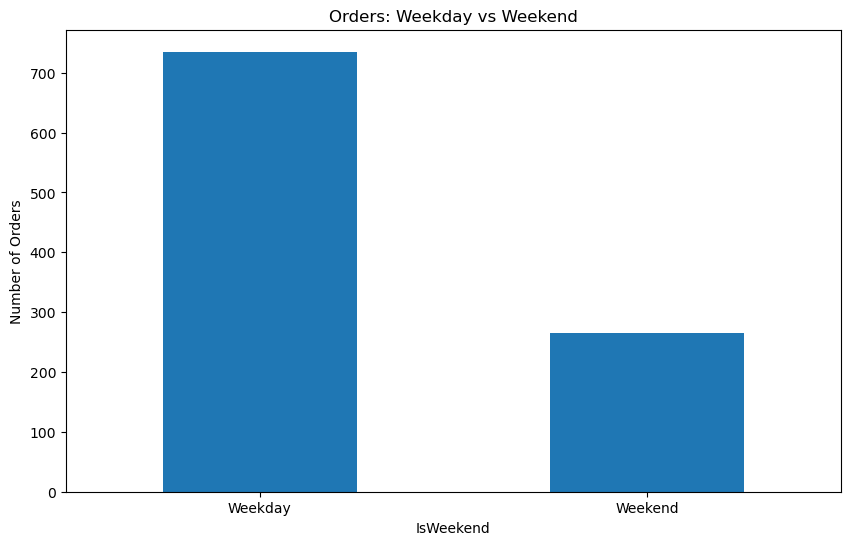

In [132]:
plt.figure(figsize=(10, 6))
merged_df['IsWeekend'].value_counts().plot(kind='bar', title='Orders: Weekday vs Weekend', rot=0)
plt.ylabel('Number of Orders')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.show()

In [136]:
# Calculate AOV overall and regionally
overall_aov = merged_df['TotalValue'].mean()
print(f"Overall Average Order Value (AOV): ${overall_aov:,.2f}")
region_aov = merged_df.groupby('Region')['TotalValue'].mean()
region_aov_percentage = (region_aov / overall_aov) * 100
print("Regional AOV as Percentage of Overall AOV:")
print(region_aov_percentage)

Overall Average Order Value (AOV): $690.00
Regional AOV as Percentage of Overall AOV:
Region
Asia             101.100883
Europe           102.970209
North America     90.469458
South America    104.573785
Name: TotalValue, dtype: float64


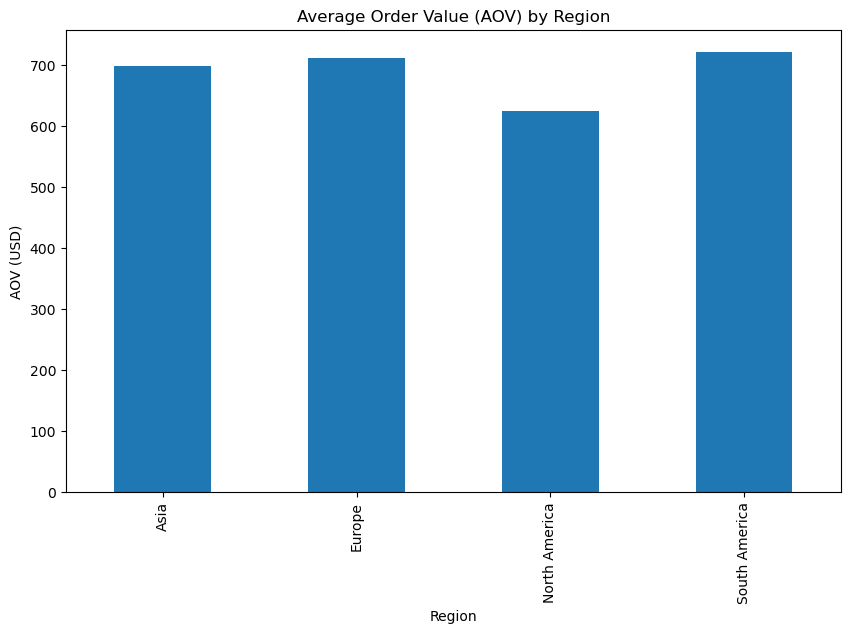

In [138]:
plt.figure(figsize=(10, 6))
region_aov.plot(kind='bar', title='Average Order Value (AOV) by Region')
plt.ylabel('AOV (USD)')
plt.xlabel('Region')
plt.show()

In [140]:
# Identify the highest and lowest-selling products by location
region_product_sales = merged_df.groupby(['Region', 'ProductName'])['TotalValue'].sum().reset_index()
region_highest_sales = region_product_sales.loc[region_product_sales.groupby('Region')['TotalValue'].idxmax()]
region_lowest_sales = region_product_sales.loc[region_product_sales.groupby('Region')['TotalValue'].idxmin()]
region_highest_sales['Percentage'] = (region_highest_sales['TotalValue'] / total_revenue) * 100
region_lowest_sales['Percentage'] = (region_lowest_sales['TotalValue'] / total_revenue) * 100

In [142]:
print("Highest-Selling Products by Region:")
print(region_highest_sales[['Region', 'ProductName', 'TotalValue', 'Percentage']])
print()

Highest-Selling Products by Region:
            Region            ProductName  TotalValue  Percentage
20            Asia      BookWorld Sweater     7266.20    1.053079
76          Europe     BookWorld Cookbook     8360.56    1.211683
132  North America  ActiveWear Smartwatch    10080.99    1.461022
196  South America  ActiveWear Smartwatch    14226.61    2.061841



In [144]:
print("Lowest-Selling Products by Region:")
print(region_lowest_sales[['Region', 'ProductName', 'TotalValue', 'Percentage']])

Lowest-Selling Products by Region:
            Region                  ProductName  TotalValue  Percentage
27            Asia         ComfortLiving Laptop      134.95    0.019558
103         Europe  SoundWave Bluetooth Speaker       64.38    0.009330
167  North America  SoundWave Bluetooth Speaker      128.76    0.018661
214  South America         ComfortLiving Laptop       80.97    0.011735
